In [1]:
using Random
using Plots

In [2]:
p = zeros(200,200)

infected_cells =[]

push!(infected_cells, (11,41))
p[11,11] = 1

push!(infected_cells, (121,151))
p[121,151] = 1


function infect()
    to_add = []
    infected = 0
    for cell in infected_cells
        a = (cell[1]+rand(-1:1:1), cell[2]+rand(-1:1:1))
        if a[1]>=1 && a[1]<=size(p)[1] && a[2]>=1 && a[2]<=size(p)[2] && p[a[1], a[2]]==0 
            push!(to_add, a)
            infected +=1
            p[a[1],a[2]] = 1
        end
    end
    for s in to_add 
        push!(infected_cells, s)
    end
    return infected
end

function recover()
    to_remove = []
    recovered = 0
    dead = 0
    for cell in infected_cells
        if rand(Int8)%15==0
            push!(to_remove, cell)
            if rand(Int8)%41==0
               p[cell[1], cell[2]] = 3
                dead += 1
            else
                p[cell[1], cell[2]] = 2
                recovered +=1
            end
        end
    end
    filter!(e-> !(e in to_remove) ,infected_cells)
    return recovered, dead
end



recover (generic function with 1 method)

In [3]:
t = 500

infected = []
recovered = []
dead = []
anim = @animate for i in 1:t
        push!(infected,infect())
        re, de = recover()
        push!(recovered,re)
        push!(dead,de)
        plot(heatmap(p,c = [:blue, :green, :red, :black]))
    end

Animation("/tmp/jl_NasQUE", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000491.png", "000492.png", "000493.png", "000494.png", "000495.png", "000496.png", "000497.png", "000498.png", "000499.png", "000500.png"])

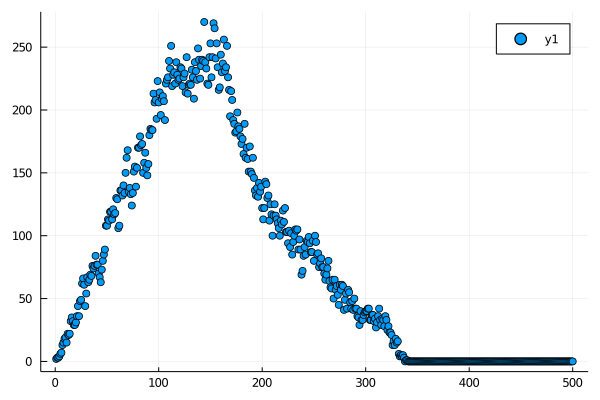

In [4]:
scatter(1:t, infected) 

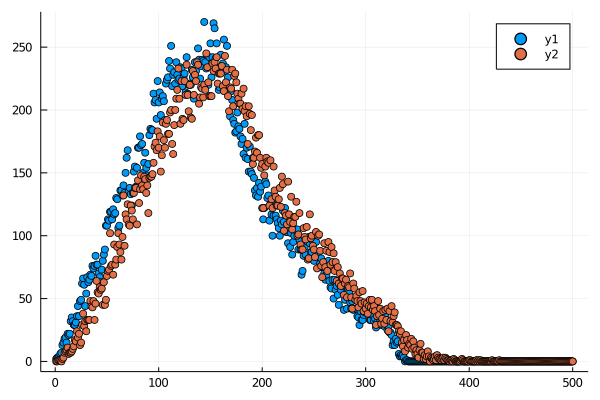

In [5]:
scatter!(1:t, recovered) 

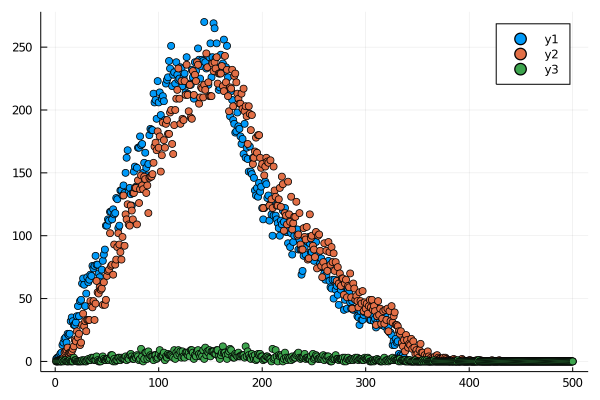

In [6]:
scatter!(1:t, dead) 

In [7]:
healthy = [size(p)[1]*size(p)[2]]

infected_total = [0]
infected_act = [0]

recovered_total = [0]
dead_total = [0]
for i in 1:t-1
    push!(healthy,healthy[i]-infected[i+1])
    push!(infected_total,infected_total[i]+infected[i+1])
    push!(infected_act,infected_act[i]+infected[i+1]-recovered[i+1]-dead[i+1])
    push!(recovered_total,recovered_total[i]+recovered[i+1])
    push!(dead_total,dead_total[i]+dead[i+1])
end

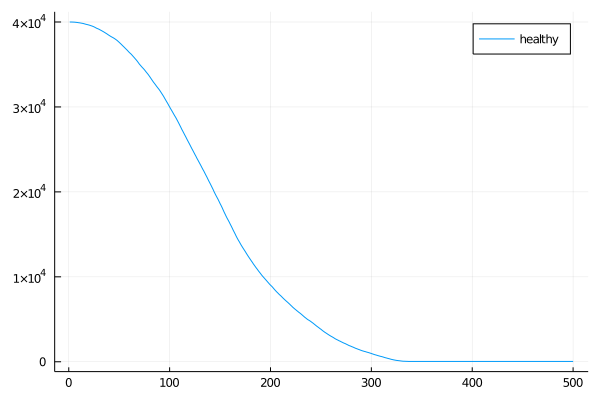

In [13]:
plot(1:t, healthy, label="healthy") 

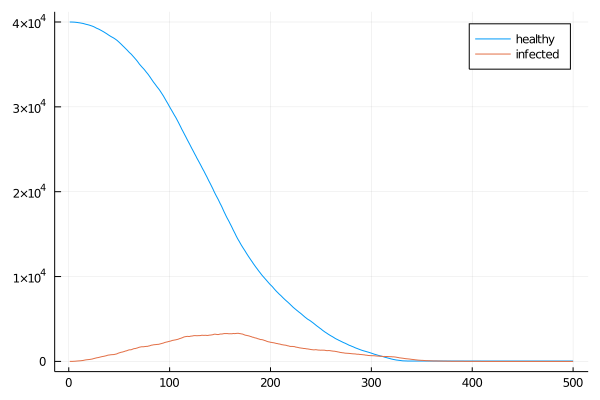

In [14]:
plot!(1:t, infected_act, label="infected") 

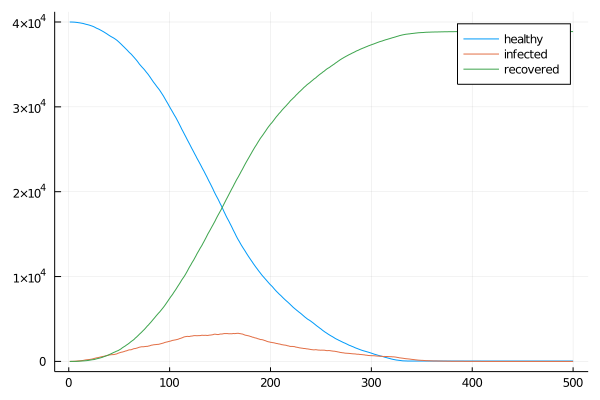

In [15]:
plot!(1:t, recovered_total, label="recovered") 

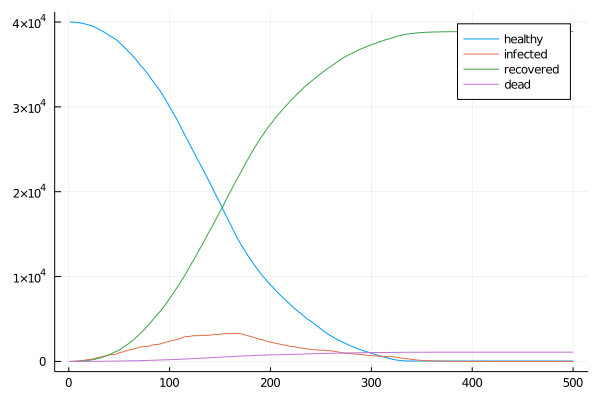

In [16]:
plot!(1:t, dead_total, label="dead") 

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/Lab7/anim.gif
└ @ Plots /opt/julia/packages/Plots/z5Msu/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/work/Lab7/anim.gif")
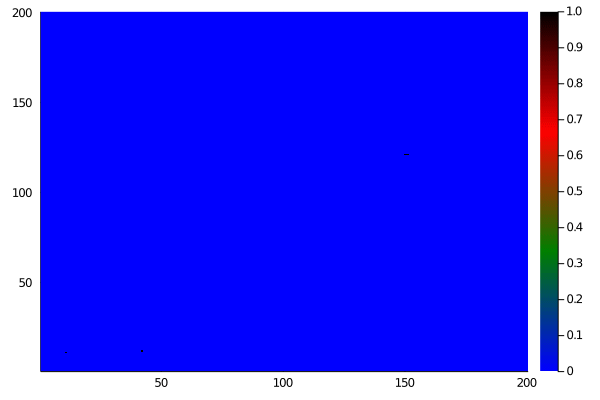

In [12]:
gif(anim, "anim.gif")